<a href="https://colab.research.google.com/github/migoamr/Postwork1/blob/main/Bacterial_Colony_Growth_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description: This Project aims to create a mathematical model to simualte the exponential growth of a bacterial colony in a petri dish and visualize the results.

Single growth rate data exported to:bacterial_growth_results/bacterial_growth_single_r_0.5.csv


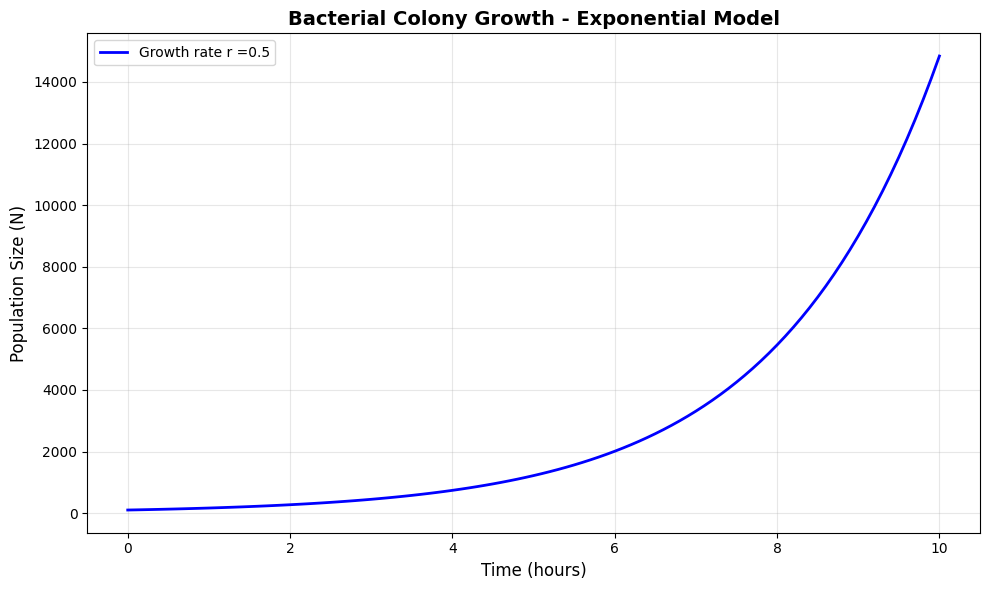

Multiple growth rates data exported to:bacterial_growth_results/bacterial_growth_multiple_rates.csv


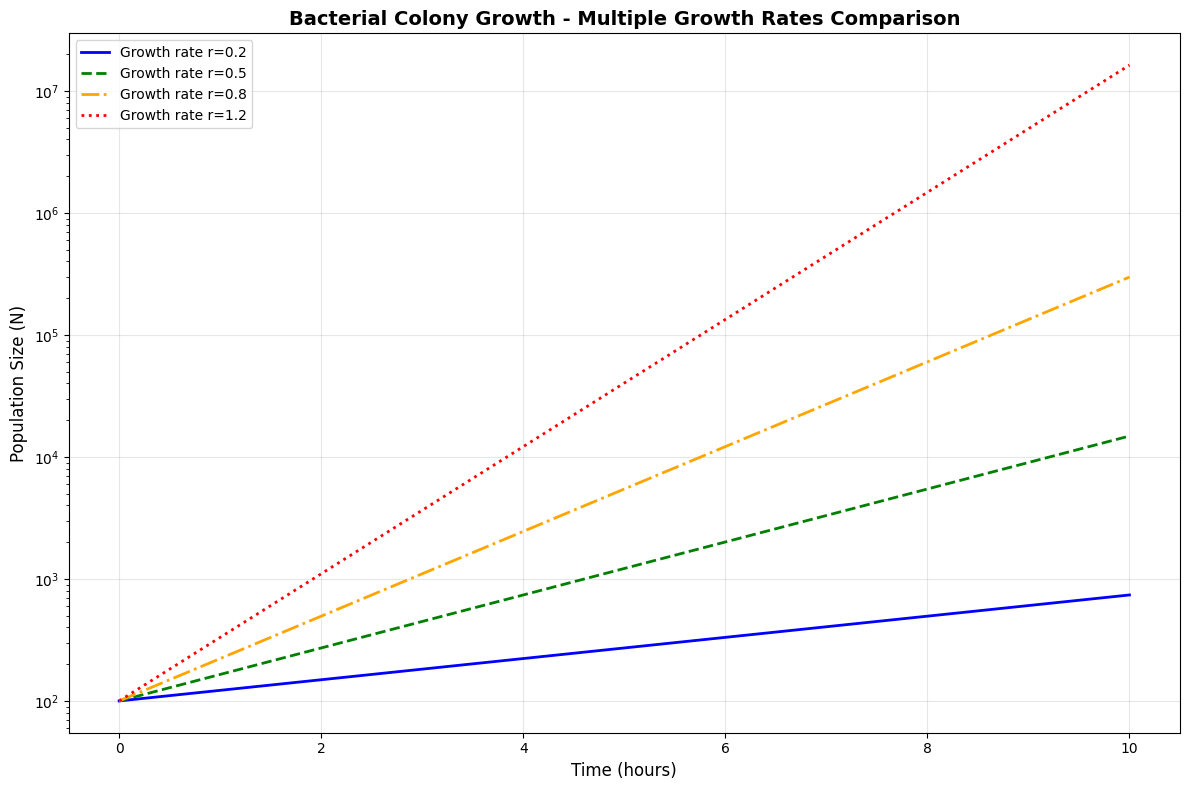


Bacterial Growth Simulation Results
Initial population (N0): 100 bacteria
Simulation time : 10 hours
Time step : 0.1 hours

Final population size for different growth rates:
r=0.2: 739 bacteria, Doubling Time: 3.47 hours
r=0.5: 14841 bacteria, Doubling Time: 1.39 hours
r=0.8: 298096 bacteria, Doubling Time: 0.87 hours
r=1.2: 16275479 bacteria, Doubling Time: 0.58 hours
Summary statistics exported to:bacterial_growth_results/growth_summary_statistics.csv


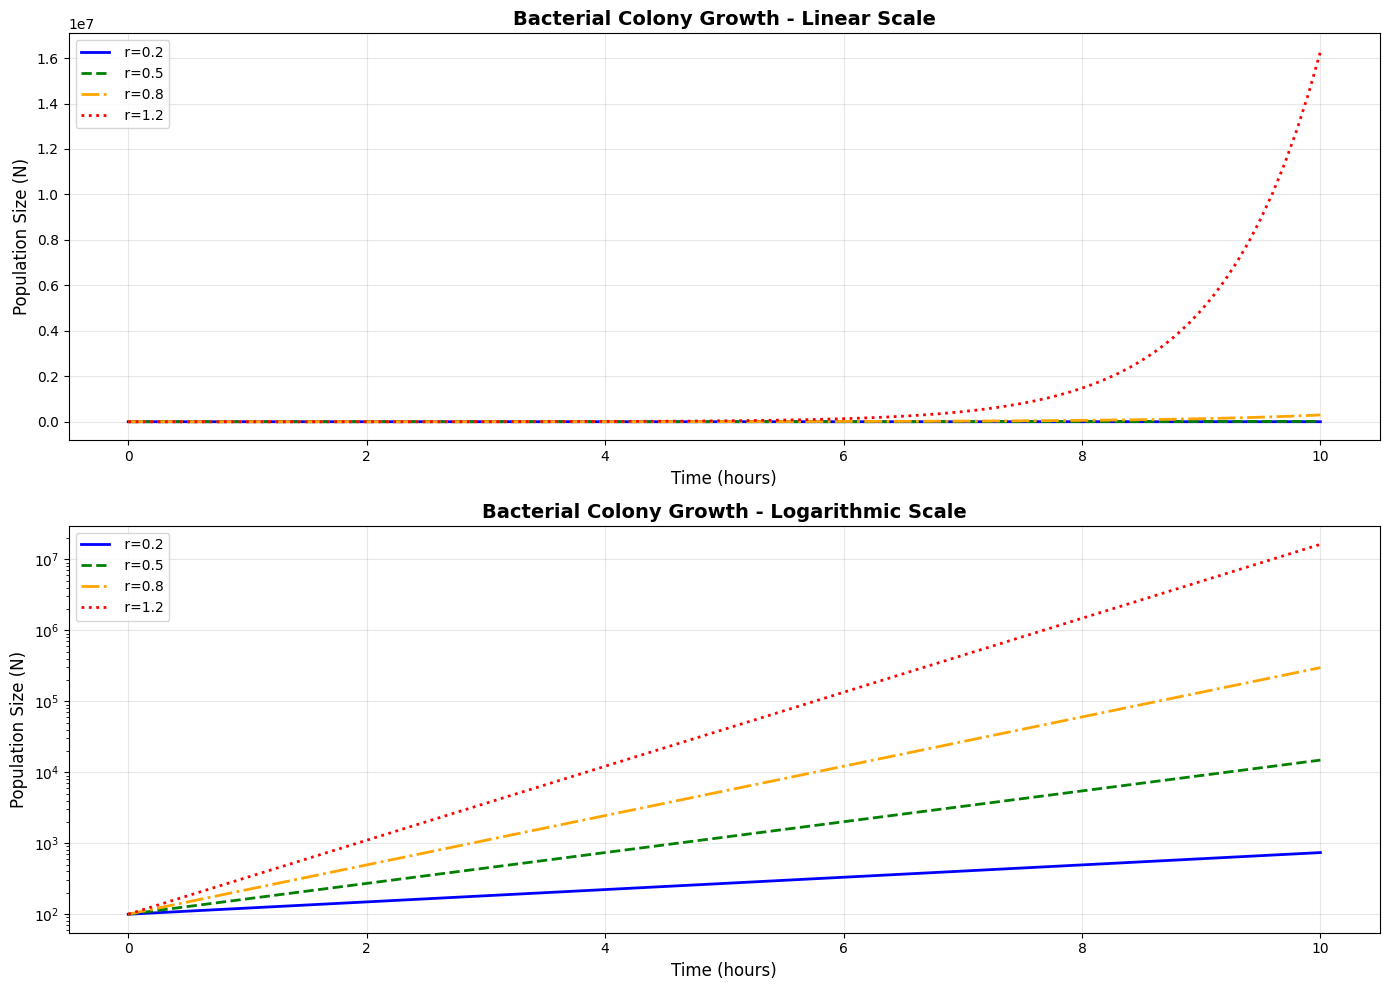

Exponential vs Logistic growth data exported to:bacterial_growth_results/exponential_vs_logistic_growth.csv


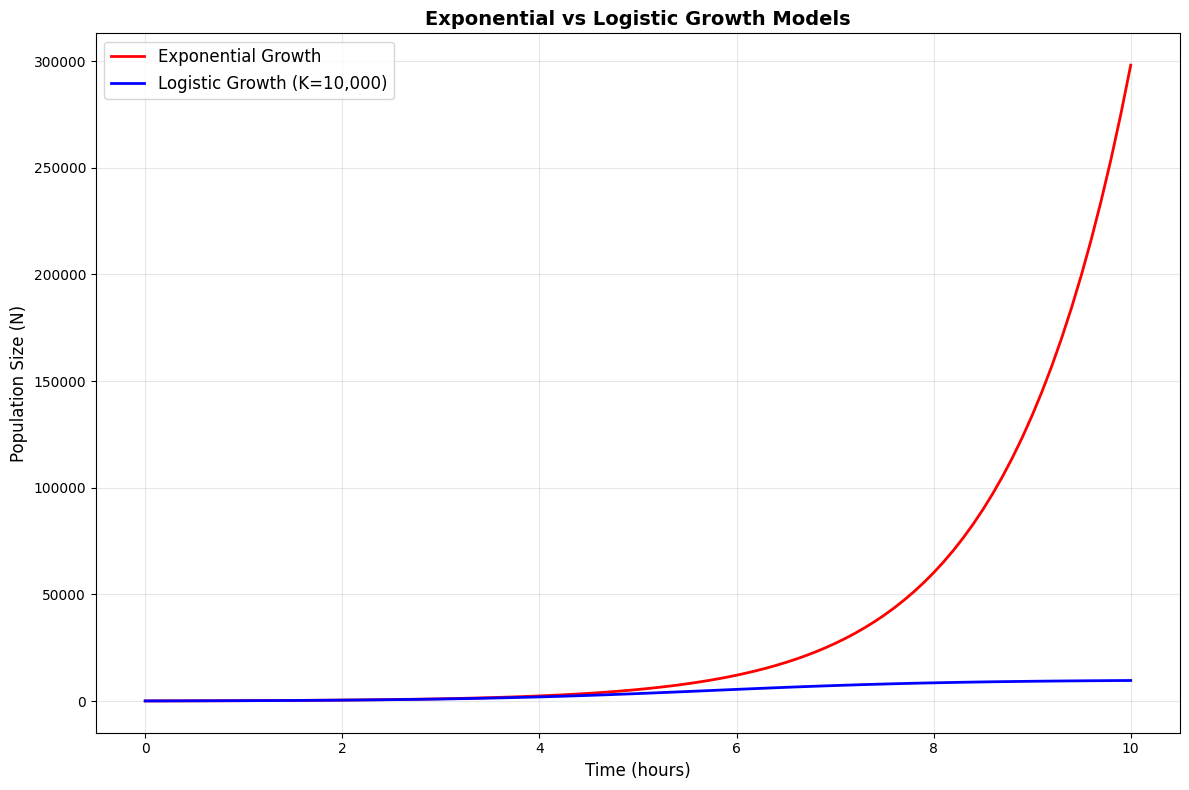

Simulation metadata exported to:bacterial_growth_results/simulation_metadata.csv

EXPORTED FILES SUMMARY
✔bacterial_growth_results/bacterial_growth_single_r_0.5.csv: 3.1 KB
✔bacterial_growth_results/bacterial_growth_multiple_rates.csv: 8.2 KB
✔bacterial_growth_results/growth_summary_statistics.csv: 0.2 KB
✔bacterial_growth_results/exponential_vs_logistic_growth.csv: 5.1 KB
✔bacterial_growth_results/simulation_metadata.csv: 0.2 KB
✔bacterial_growth_results/bacterial_growth_single_r_0.5.png: 135.6 KB
✔bacterial_growth_results/bacterial_growth_multiple_rates.png: 268.7 KB
✔bacterial_growth_results/bacterial_growth_comparison_dual_scale.png: 340.4 KB
✔bacterial_growth_results/exponential_vs_logistic.png: 170.9 KB

All files saved in: /content/bacterial_growth_results


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime

results_dir= "bacterial_growth_results"
if not os.path.exists(results_dir):
  os.makedirs(results_dir)
N0 = 100
r = 0.5
t_max= 10
dt = 0.1

time= np.arange(0, t_max + dt, dt)

def bacterial_growth(N0, r, time):
  return N0 * np.exp(r * time)

population = bacterial_growth(N0, r, time)

single_growth_data = pd.DataFrame({
    'Time_hours': time,
    'Population': population,
    'Growth_Rate': r
  })

single_csv_filename = f"{results_dir}/bacterial_growth_single_r_{r}.csv"
single_growth_data.to_csv(single_csv_filename, index=False)
print(f"Single growth rate data exported to:{single_csv_filename}")

plt.figure(figsize=(10, 6))
plt.plot(time, population, 'b-', linewidth=2, label=f'Growth rate r ={r}')
plt.title('Bacterial Colony Growth - Exponential Model', fontsize=14, fontweight='bold')
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Population Size (N)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(f"{results_dir}/bacterial_growth_single_r_{r}.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 8))

growth_rates = [0.2, 0.5, 0.8, 1.2]
colors=['blue', 'green', 'orange', 'red']
line_styles = ['-', '--', '-.', ':']

multi_growth_data = pd.DataFrame({'Time_hours':time})

for i, r_value in enumerate(growth_rates):
  pop = bacterial_growth(N0, r_value, time)
  plt.plot(time, pop, color=colors[i], linestyle=line_styles[i], linewidth=2, label=f'Growth rate r={r_value}')
  multi_growth_data[f'Population_r_{r_value}'] = pop

multi_csv_filename = f"{results_dir}/bacterial_growth_multiple_rates.csv"
multi_growth_data.to_csv(multi_csv_filename, index=False)
print(f"Multiple growth rates data exported to:{multi_csv_filename}")

plt.title('Bacterial Colony Growth - Multiple Growth Rates Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Population Size (N)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.yscale ('log')
plt.tight_layout()
plt.savefig(f"{results_dir}/bacterial_growth_multiple_rates.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nBacterial Growth Simulation Results")
print("="* 40)
print(f"Initial population (N0): {N0} bacteria")
print(f"Simulation time : {t_max} hours")
print(f"Time step : {dt} hours")

summary_data = []
print("\nFinal population size for different growth rates:")
for r_value in growth_rates:
  final_pop = bacterial_growth(N0, r_value, t_max)
  doubling_time = np.log(2) / r_value
  print (f"r={r_value}: {final_pop:.0f} bacteria, Doubling Time: {doubling_time:.2f} hours")

  summary_data.append({
      'Growth_Rate': r_value,
      'Final_Population': final_pop,
      'Doubling_Time_hours': doubling_time,
      'Initial_Population': N0
  })

summary_df = pd.DataFrame(summary_data)
summary_csv_filename = f"{results_dir}/growth_summary_statistics.csv"
summary_df.to_csv(summary_csv_filename, index=False)
print(f"Summary statistics exported to:{summary_csv_filename}")

plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
for i, r_value in enumerate(growth_rates):
  pop = bacterial_growth(N0, r_value, time)
  plt.plot(time, pop, color=colors[i], linestyle=line_styles[i], linewidth=2, label=f' r={r_value}')

plt.title('Bacterial Colony Growth - Linear Scale', fontsize=14, fontweight='bold')
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Population Size (N)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 1, 2)
for i, r_value in enumerate(growth_rates):
  pop = bacterial_growth(N0, r_value, time)
  plt.plot(time, pop, color=colors[i], linestyle=line_styles[i], linewidth=2, label=f' r={r_value}')
plt.title('Bacterial Colony Growth - Logarithmic Scale', fontsize=14, fontweight='bold')
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Population Size (N)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.yscale('log')

plt.tight_layout()
plt.savefig(f"{results_dir}/bacterial_growth_comparison_dual_scale.png", dpi=300, bbox_inches='tight')
plt.show()

def logistic_growth(N0, r, K, time):
  return K / (1 + (K / N0 - 1) * np.exp(-r * time))

K= 10000
r_comparison = 0.8

exp_pop = bacterial_growth(N0, r_comparison, time)
log_pop = logistic_growth(N0, r_comparison, K, time)

comparison_data = pd.DataFrame({
    'Time_hours': time,
    'Exponential_Growth': exp_pop,
    'Logistic_Growth': log_pop,
    'Carrying_Capacity': K
})

comparison_csv_filename = f"{results_dir}/exponential_vs_logistic_growth.csv"
comparison_data.to_csv(comparison_csv_filename, index=False)
print(f"Exponential vs Logistic growth data exported to:{comparison_csv_filename}")

plt.figure(figsize=(12, 8))
plt.plot(time, exp_pop, 'r-', linewidth=2, label='Exponential Growth')
plt.plot(time, log_pop, 'b-', linewidth=2, label='Logistic Growth (K=10,000)')
plt.title('Exponential vs Logistic Growth Models', fontsize=14, fontweight='bold')
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Population Size (N)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(f"{results_dir}/exponential_vs_logistic.png", dpi=300, bbox_inches='tight')
plt.show()

metadata={'simulation_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
          'initial_population': N0,
          'max_simulation_time': t_max,
          'time_step': dt,
          'growth_rates_tested': growth_rates,
          'carrying_capacity': K,
          'logistic_growth_rate': r_comparison
          }
metadata_df = pd.DataFrame([metadata])
metadata_csv_filename = f"{results_dir}/simulation_metadata.csv"
metadata_df.to_csv(metadata_csv_filename, index=False)
print(f"Simulation metadata exported to:{metadata_csv_filename}")

print("\n" + "="*50)
print("EXPORTED FILES SUMMARY")
print("="*50)
exported_files = [
    single_csv_filename,
    multi_csv_filename,
    summary_csv_filename,
    comparison_csv_filename,
    metadata_csv_filename,
    f"{results_dir}/bacterial_growth_single_r_{r}.png",
    f"{results_dir}/bacterial_growth_multiple_rates.png",
    f"{results_dir}/bacterial_growth_comparison_dual_scale.png",
    f"{results_dir}/exponential_vs_logistic.png"
]
for file in exported_files:
  if os.path.exists(file):
    file_size = os.path.getsize(file)/ 1024
    print(f"✔{file}: {file_size:.1f} KB")
  else:
    print(f"✘{file}: (Not found)")
print(f"\nAll files saved in: {os.path.abspath(results_dir)}")